# Case-by-case analysis
This notebook demonstrates how to visualize which model managed to solve which test-case how often.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
directory = "../data/"

collection = []
for filename in os.listdir(directory):
    if filename.endswith("_results.jsonl"):
        print(filename)
        df = pd.read_json(directory + filename, lines=True)
        df['model'] = filename.replace(".jsonl_results.jsonl", "").replace("samples_", "")
        collection.append(df)

df = pd.concat(collection)

samples_claude-3-5-sonnet-20240620.jsonl_results.jsonl
samples_claude-3-5-sonnet-20240620_biabob.jsonl_results.jsonl
samples_deepseek-coder-v2.jsonl_results.jsonl
samples_deepseek-coder-v2_biabob.jsonl_results.jsonl
samples_gpt-3.5-turbo-1106.jsonl_results.jsonl
samples_gpt-3.5-turbo-1106_biabob.jsonl_results.jsonl
samples_gpt-4o-2024-05-13.jsonl_results.jsonl
samples_gpt-4o-2024-05-13_biabob.jsonl_results.jsonl


In [3]:
df.head()

,task_id,completion,full_response,result,passed,model
0,../test_cases/apply_otsu_threshold_and_count_p...,\n# Plan:\n# 1. Import required libraries (cv2...,Here's the completed code with a step-by-step ...,failed: OpenCV(4.9.0) D:\a\opencv-python\openc...,False,claude-3-5-sonnet-20240620
1,../test_cases/binary_closing.ipynb,\n# Plan:\n# 1. Import necessary libraries (nu...,"Here's the completed code with a plan, necessa...",passed,True,claude-3-5-sonnet-20240620
2,../test_cases/binary_skeleton.ipynb,\n# Plan:\n# 1. Import necessary libraries (sk...,Here's the completed code with a step-by-step ...,failed: Input must be a 2D numpy array of bool...,False,claude-3-5-sonnet-20240620
3,../test_cases/bland_altman.ipynb,\n# Plan:\n# 1. Import required libraries (pan...,"Here's the completed code with a plan, necessa...",passed,True,claude-3-5-sonnet-20240620
4,../test_cases/combine_columns_of_tables.ipynb,\n# Plan:\n# 1. Import required library (panda...,Here's the completed code with a step-by-step ...,passed,True,claude-3-5-sonnet-20240620


In [4]:
# Ensure the 'passed' column is boolean for correct processing.
df['passed'] = df['passed'].astype(bool)
# shorten task name
df['task_id'] = [str(t).replace("../test_cases/", "").replace(".ipynb","") for t in df['task_id']]

# Pivot the dataframe to count True 'passed' values for each model-task combination.
pivot_df = df.pivot_table(index='task_id', columns='model', values='passed', aggfunc='mean', fill_value=0)

# Reset the index if 'task_id' needs to be a column instead of an index
pivot_df.reset_index(inplace=True)

# Apply formatting to display only two digits after the decimal point for all columns after the first (task_id column)
pivot_df = pivot_df.round(2)

pivot_df

model,task_id,claude-3-5-sonnet-20240620,claude-3-5-sonnet-20240620_biabob,deepseek-coder-v2,deepseek-coder-v2_biabob,gpt-3.5-turbo-1106,gpt-3.5-turbo-1106_biabob,gpt-4o-2024-05-13,gpt-4o-2024-05-13_biabob
0,apply_otsu_threshold_and_count_postiive_pixels,0.0,0.9,0.0,0.6,0.0,0.1,0.0,0.0
1,binary_closing,1.0,1.0,0.6,0.4,0.1,0.0,0.9,0.0
2,binary_skeleton,0.8,1.0,0.3,0.9,0.1,0.6,0.9,0.9
3,bland_altman,1.0,1.0,1.0,0.9,1.0,1.0,1.0,1.0
4,combine_columns_of_tables,1.0,0.8,1.0,0.7,0.9,0.9,0.6,0.3
5,convex_hull_measure_area,1.0,1.0,0.2,0.5,0.8,1.0,1.0,1.0
6,convolve_images,0.5,0.8,0.4,0.0,0.1,0.6,0.6,1.0
7,count_number_of_touching_neighbors,0.8,0.0,0.0,0.0,0.1,0.0,0.6,0.2
8,count_objects_over_time,0.6,0.6,0.6,0.5,0.1,0.2,0.6,0.8
9,count_overlapping_regions,1.0,0.6,0.2,0.1,0.4,0.0,1.0,0.9


0.13.2


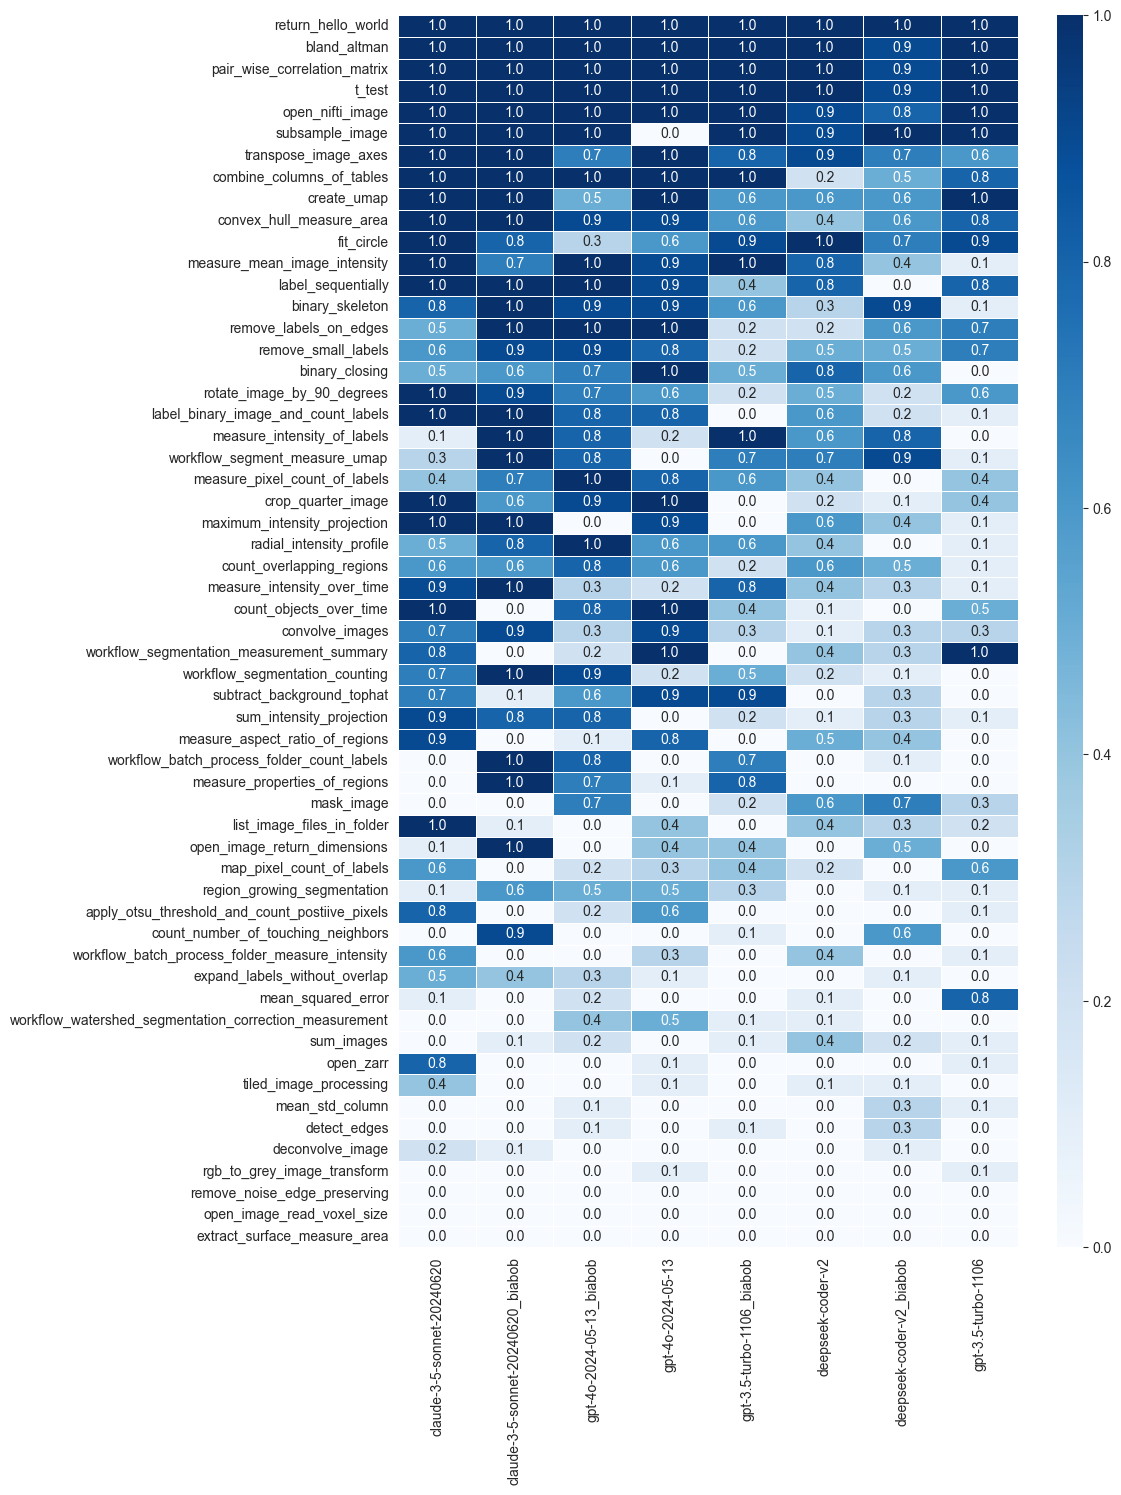

In [5]:
print(sns.__version__)
sns.set_style("white")

df = pivot_df

# Separate the numerical data for plotting and the string column for y-axis labels
numerical_data = df.select_dtypes(include=[np.number])
mean_values = numerical_data.mean().sort_values(ascending=False)

# Reorder columns in numerical_data based on sorted mean values
numerical_data = numerical_data[mean_values.index]

df["average_task_score"] = df.iloc[:,1:-1].mean(axis=1)
str_column_values = df.sort_values(by="average_task_score", ascending=False)['task_id']  # Replace 'str_column' with the actual column name

# Plotting
fig = plt.figure(figsize=(10,16))
numerical_data["average_task_score"] = df.iloc[:,1:-1].mean(axis=1)

sns.heatmap(numerical_data.sort_values("average_task_score",ascending=False).drop(columns=("average_task_score")), annot=True, linewidths=.5, yticklabels=str_column_values, fmt=".1f", cbar_kws={'shrink': 1, 'aspect': 3*16}, cmap="Blues")
plt.gca().set_xlabel('')

plt.savefig("../docs/paper/performance_per_task", bbox_inches="tight", dpi=300)
plt.show()

In [6]:
pivot_df.describe()

model,claude-3-5-sonnet-20240620,claude-3-5-sonnet-20240620_biabob,deepseek-coder-v2,deepseek-coder-v2_biabob,gpt-3.5-turbo-1106,gpt-3.5-turbo-1106_biabob,gpt-4o-2024-05-13,gpt-4o-2024-05-13_biabob,average_task_score
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,0.580702,0.571930,0.368421,0.352632,0.333333,0.392982,0.508772,0.528070,0.444110
std,0.404633,0.445916,0.344424,0.324646,0.379065,0.380723,0.410697,0.394042,0.292400
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,0.214286
50%,0.700000,0.800000,0.400000,0.300000,0.100000,0.300000,0.600000,0.700000,0.428571
75%,1.000000,1.000000,0.600000,0.600000,0.700000,0.700000,0.900000,0.900000,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


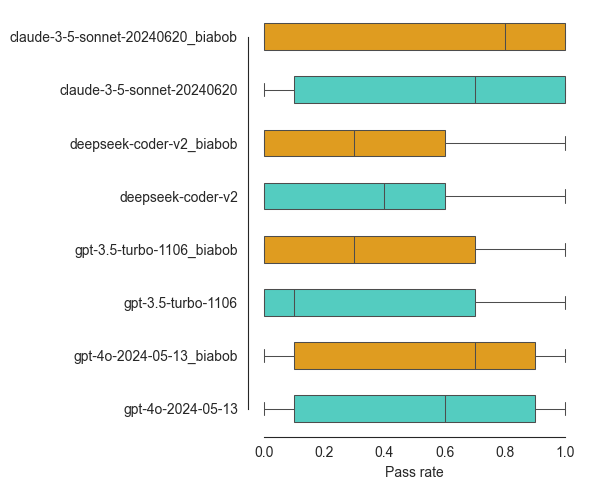

In [9]:
numerical_data = pivot_df.drop(columns=['task_id']).drop(columns=("average_task_score"))

# Separate columns into those ending with '_biabob' and those without it
biabob_cols = [col for col in numerical_data.columns if col.endswith('_biabob')]
non_biabob_cols = [col for col in numerical_data.columns if not col.endswith('_biabob')]

# Create a new ordered list of columns by pairing 'x_biabob' with 'x'
paired_columns = []
for col in non_biabob_cols:
    biabob_col = f"{col}_biabob"
    if biabob_col in biabob_cols:
        paired_columns.append(biabob_col)
    paired_columns.append(col)

# Reorder the DataFrame based on the paired column order
paired_data = numerical_data[paired_columns]

# Update the colors based on paired_data
colors_paired = ['orange' if col.endswith('_biabob') else 'turquoise' for col in paired_columns]

# Plotting the boxplot with paired columns
plt.figure(figsize=(6, 5))
boxplot = sns.boxplot(data=paired_data, palette=colors_paired, width=0.5, linewidth=0.75, orient='h')
sns.despine(offset=1, trim=True)

plt.yticks(rotation=0)  
plt.xlabel('Pass rate')  
plt.gca().set_ylabel('')  
plt.tight_layout()  

plt.savefig("../docs/paper/pass_rate_llms.png", dpi=700)
plt.show()

In [8]:
with open("model_order.txt", 'w') as f:
    for item in ordered_numerical_data.columns:
        f.write(str(item) + '\n')

NameError: name 'ordered_numerical_data' is not defined